# 商业异常消费数据预测

In [1]:
#数据加载
import pandas as pd
import numpy as np
data = pd.read_csv('task2_data.csv')
data.head()

,pay1,pay2,y
0,2.89738,0.057948,1
1,10.38230,8.777660,0
2,14.00400,87.967200,1
3,104.30600,45.734200,1
4,80.88530,113.010600,1


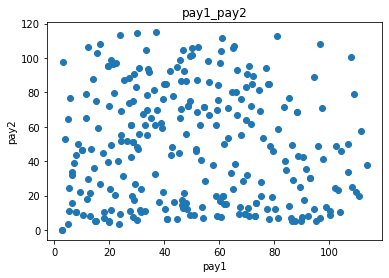

In [2]:
#数据可视化
from matplotlib import pyplot as plt
fig1= plt.figure()
plt.scatter(data.loc[:,'pay1'],data.loc[:,'pay2'])
plt.title('pay1_pay2')
plt.xlabel('pay1')
plt.ylabel('pay2')
plt.show()

In [3]:
#创建mask
mask= data.loc[:,'y']==1
print(mask)

0       True
1      False
2       True
3       True
4       True
       ...  
268     True
269     True
270    False
271    False
272    False
Name: y, Length: 273, dtype: bool


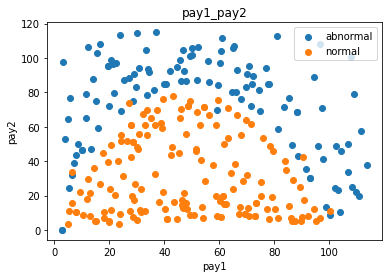

In [4]:
fig1= plt.figure()
abnormal = plt.scatter(data.loc[:,'pay1'][mask],data.loc[:,'pay2'][mask])
normal = plt.scatter(data.loc[:,'pay1'][~mask],data.loc[:,'pay2'][~mask])

plt.title('pay1_pay2')
plt.xlabel('pay1')
plt.ylabel('pay2')
plt.legend((abnormal,normal),('abnormal','normal'))
plt.show()

In [5]:
#X y赋值
X = data.drop(['y'],axis=1)
y = data.loc[:,'y']
X.head()
y.head()
print(X.shape,y.shape)

(273, 2) (273,)


In [6]:
#建立线性边界分类模型
from sklearn.linear_model import LogisticRegression
LR1 = LogisticRegression()
LR1.fit(X,y)

LogisticRegression()

In [7]:
#模型预测
y_predict = LR1.predict(X)
print(y_predict)
print(y)

[0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0
 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1
 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1
 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1
 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0
 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0
 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 1 1 0 1 0]
0      1
1      0
2      1
3      1
4      1
      ..
268    1
269    1
270    0
271    0
272    0
Name: y, Length: 273, dtype: int64


In [8]:
#准确率计算
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

0.8021978021978022


In [9]:
#边界函数参数获取
theta0 = LR1.intercept_
theta1,theta2 = LR1.coef_[0][0],LR1.coef_[0][1]
print(theta0,theta1,theta2)

[-4.40891298] 0.019871842206776492 0.05845462890840053


In [10]:
X1 = data.loc[:,'pay1']
print(X1)

0        2.89738
1       10.38230
2       14.00400
3      104.30600
4       80.88530
         ...    
268     64.94970
269     16.66000
270     19.31590
271     63.01810
272     24.38630
Name: pay1, Length: 273, dtype: float64


In [11]:
X2_new = -(theta0+theta1*X1)/theta2
print(X2_new)

0      74.439557
1      71.895034
2      70.663826
3      39.965365
4      47.927309
         ...    
268    53.344668
269    69.760910
270    68.858028
271    54.001322
272    67.134329
Name: pay1, Length: 273, dtype: float64


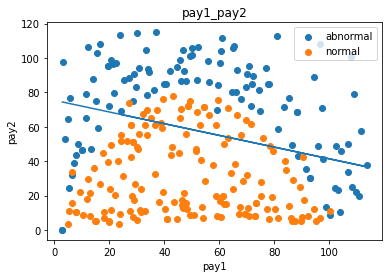

In [12]:
fig2= plt.figure()
abnormal = plt.scatter(data.loc[:,'pay1'][mask],data.loc[:,'pay2'][mask])
normal = plt.scatter(data.loc[:,'pay1'][~mask],data.loc[:,'pay2'][~mask])
plt.plot(X1,X2_new)
plt.title('pay1_pay2')
plt.xlabel('pay1')
plt.ylabel('pay2')
plt.legend((abnormal,normal),('abnormal','normal'))
plt.show()

Bounding Function： $\theta_0 + \theta_1 X_1 + \theta_2 X_2 = 0$

2nd order Bounding Function：$\theta_0 + \theta_1 X_1 + \theta_2 X_2+ \theta_3
X_1^2 +
\theta_4 X_2^2 + \theta_5 X_1 X_2 = 0$

In [13]:
X2 = data.loc[:,'pay2']
print(X2)

0        0.057948
1        8.777660
2       87.967200
3       45.734200
4      113.010600
          ...    
268    106.091800
269    108.059800
270     39.515800
271     70.852400
272     55.457000
Name: pay2, Length: 273, dtype: float64


In [14]:
#生成二次项
X1_2 = X1*X1
X2_2 = X2*X2
X1_X2 = X1*X2
print(X1_2.shape,X2_2.shape,X1_X2.shape)
print(X1[0],X2[0],X1_2[0],X2_2[0],X1_X2[0])

(273,) (273,) (273,)
2.89738 0.0579476 8.3948108644 0.00335792434576 0.167896217288


In [15]:
#创建二次分类边界数据
X_new = {'X1':X1,'X2':X2,'X1_2':X1_2,'X2_2':X2_2,'X1_X2':X1_X2}
X_new = pd.DataFrame(X_new)
print(X_new)

            X1          X2          X1_2          X2_2        X1_X2
0      2.89738    0.057948      8.394811      0.003358     0.167896
1     10.38230    8.777660    107.792153     77.047315    91.132299
2     14.00400   87.967200    196.112016   7738.228276  1231.892669
3    104.30600   45.734200  10879.741636   2091.617050  4770.351465
4     80.88530  113.010600   6542.431756  12771.395712  9140.896284
..         ...         ...           ...           ...          ...
268   64.94970  106.091800   4218.463530  11255.470027  6890.630582
269   16.66000  108.059800    277.555600  11676.920376  1800.276268
270   19.31590   39.515800    373.103993   1561.498450   763.283241
271   63.01810   70.852400   3971.280928   5020.062586  4464.983628
272   24.38630   55.457000    594.691628   3075.478849  1352.391039

[273 rows x 5 columns]


In [16]:
#建立新模型
LR2 = LogisticRegression()
LR2.fit(X_new,y)

LogisticRegression()

In [17]:
#模型预测
y2_predict = LR2.predict(X_new)
print(y2_predict)

[0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0
 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1
 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1
 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1
 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0
 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0
 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 1 1 0 0 0]


In [18]:
#准确率
accuracy2 = accuracy_score(y,y2_predict)
print(accuracy2)

0.9743589743589743


边界函数： $\theta_0 + \theta_1 X_1 + \theta_2 X_2 = 0$

二阶边界函数：$\theta_0 + \theta_1 X_1 + \theta_2 X_2+ \theta_3 X_1^2 + \theta_4 X_2^2 + \theta_5 X_1 X_2 = 0$

$a x^2 + b x + c=0: x1 = (-b+(b^2-4ac)^.5)/2a,x1 = (-b-(b^2-4ac)^.5)/2a$

$\theta_4 X_2^2 + (\theta_5 X_1+ \theta_2) X_2 + (\theta_0 + \theta_1 X_1 + \theta_3 X_1^2)=0$

In [19]:
#边界函数参数获取
theta0 = LR2.intercept_
theta1,theta2,theta3,theta4,theta5 = LR2.coef_[0][0],LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]
print(theta0,theta1,theta2,theta3,theta4,theta5)

[-0.00635738] -0.891534307903713 0.15639358173542114 0.008762425862030604 0.0011621091405775285 0.0006825490016426928


In [20]:
X1_new = X1.sort_values()
print(X1_new)
print(X1)

0        2.89738
89       2.89738
155      3.13883
200      3.86318
14       4.82897
         ...    
266    109.13500
92     109.85900
214    110.82500
48     111.54900
243    113.72200
Name: pay1, Length: 273, dtype: float64
0        2.89738
1       10.38230
2       14.00400
3      104.30600
4       80.88530
         ...    
268     64.94970
269     16.66000
270     19.31590
271     63.01810
272     24.38630
Name: pay1, Length: 273, dtype: float64


In [21]:
a = theta4
b = theta5*X1_new + theta2
c = theta0+theta1*X1_new+theta3*X1_new*X1_new
X2_new_2 = (-b+np.sqrt(b*b-4*a*c))/(2*a)
print(X2_new_2)

0      14.370763
89     14.370763
155    15.406907
200    18.400695
14     22.149706
         ...    
266   -37.754813
92    -43.028836
214   -50.998283
48    -57.988155
243          NaN
Name: pay1, Length: 273, dtype: float64


/Users/kylin/pythonData/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


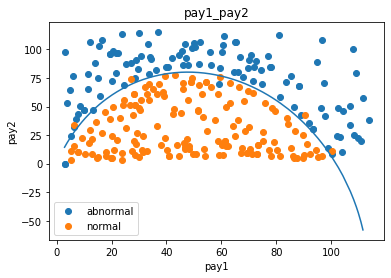

In [22]:
fig2= plt.figure()
abnormal = plt.scatter(data.loc[:,'pay1'][mask],data.loc[:,'pay2'][mask])
normal = plt.scatter(data.loc[:,'pay1'][~mask],data.loc[:,'pay2'][~mask])
plt.plot(X1_new,X2_new_2)
plt.title('pay1_pay2')
plt.xlabel('pay1')
plt.ylabel('pay2')
plt.legend((abnormal,normal),('abnormal','normal'))
plt.show()

In [23]:
#新样本预测pay1=80, pay2=20
X_test = np.array([[80,20,80*80,20*20,80*20]])
y_predict = LR2.predict(X_test)
print(X_test)
print('abnormal' if y_predict==1 else 'normal')

[[  80   20 6400  400 1600]]
normal


![materials](materials2.png)